In [2]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

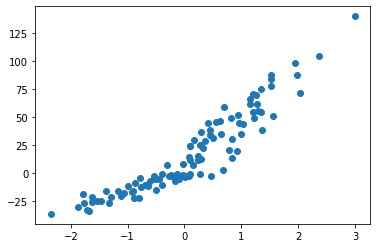

In [22]:
x,y = make_regression(n_samples=100,n_features=1,noise=10)
y = y + abs(y/2)
plt.scatter(x,y)

In [23]:
print(x.shape)
y=y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)
(100, 1)


In [24]:
X = np.hstack((x,np.ones(x.shape)))
X = np.hstack((x**2,X))

In [25]:
theta = np.random.randn(3,1)
theta

array([[-1.77387044],
       [-0.25817253],
       [ 0.51925865]])

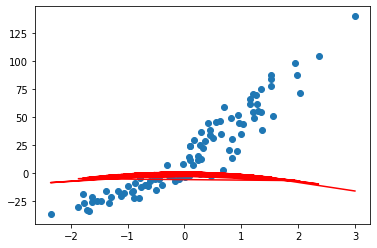

In [26]:
def model(X,theta):
    return X.dot(theta)
plt.scatter(x,y)
plt.plot(x,model(X,theta),c='r')

In [27]:
def cost_function(X,y,theta):
    m=len(y)
    return 1/2*m*np.sum((model(X,theta)-y)**2)
cost_function(X,y,theta)

8867878.995519005

In [28]:
def grad(X,y,theta):
    m=len(y)
    return 1/m*X.T.dot(model(X,theta)-y)

In [29]:
def gradient_descent(X,y,theta,learning_rate,n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range (0,n_iterations):
        theta = theta -learning_rate * grad(X,y,theta)
        cost_history[i]=cost_function(X,y,theta)
    return theta,cost_history


In [30]:
theta_final, cost_history= gradient_descent(X,y,theta,learning_rate=0.001,n_iterations=10000)

In [31]:
theta_final

array([[ 5.12259517],
       [30.84464061],
       [ 8.65160698]])

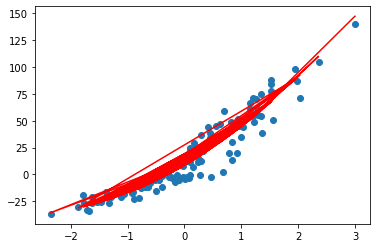

In [32]:
predictions = model (X,theta_final)
plt.scatter(x[:,0],y)
plt.plot(x[:,0],predictions,c='r')

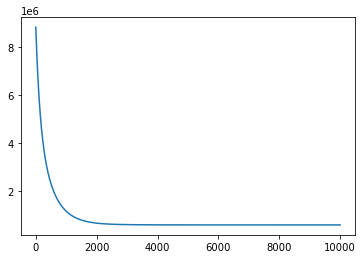

In [33]:
plt.plot(range(10000),cost_history)

In [34]:
def coef_determination(y,pred):
    u =((y-pred)**2).sum()
    v = ((y-y.mean())**2).sum()
    return 1 - u/v

In [35]:
coef_determination(y,predictions)

0.9082792284575618